# `L`anguage `T`echnology `P`latform
https://ltp.readthedocs.io/zh_CN/latest/index.html

In [1]:
import os

In [2]:
PATH = 'ltp_data_v3.4.0/'  # https://pan.baidu.com/share/link?shareid=1988562907&uk=2738088569#list/path=%2F
CWS_MODEL = PATH + 'cws.model'  # 分词
MD5_TXT = PATH + 'md5.txt'
NER_MODEL = PATH + 'ner.model'  # 命名实体识别
PARSER_MODEL = PATH + 'parser.model'  # 依存句法分析
PISRL_MODEL = PATH + 'pisrl.model'  # 语义角色标注
POS_MODEL = PATH + 'pos.model'  # 词性标注
VERSION = PATH + 'version'
TMP = PATH + 'temporary.txt'

In [3]:
with open(VERSION) as f:
    print('版本：%s' % f.read().strip())

版本：3.4.0


In [4]:
SEP = '  '

In [5]:
text = '梁山泊林冲落草。汴京城杨志卖刀。'

In [6]:
# 新建外部词典
with open(TMP, 'w', encoding='utf-8') as f:
    f.write('梁山泊 ns\n林冲 nh\n落草 v\n汴京城 ns')

### 分句

In [7]:
from pyltp import SentenceSplitter
sentences = SentenceSplitter.split(text)
print(SEP.join(sentences))

梁山泊林冲落草。  汴京城杨志卖刀。


### 分词

In [8]:
from pyltp import Segmentor
segmentor = Segmentor()  # 初始化实例
segmentor.load(CWS_MODEL)  # 读取模型
words = segmentor.segment(text)  # 分词
segmentor.release()  # 释放模型
print(SEP.join(words))

梁山  泊林  冲  落  草  。  汴  京城  杨志  卖  刀  。


### 外部词典加载

In [9]:
segmentor = Segmentor()  # 初始化实例
segmentor.load_with_lexicon(CWS_MODEL, TMP)  # 第2个参数是外部词典路径
words = list(segmentor.segment(text))  # 分词
segmentor.release()  # 释放模型
print(SEP.join(words))

梁山泊  林冲  落草  。  汴京城  杨志  卖  刀  。


### 词性标注

In [10]:
from pyltp import Postagger
postagger = Postagger()  # 初始化实例
postagger.load_with_lexicon(POS_MODEL, TMP)  # 第2个参数是外部词典路径
postags = list(postagger.postag(words))  # 词性标注
postagger.release()  # 释放模型
print(SEP.join(postags))

ns  nh  v  wp  ns  nh  v  n  wp


### 命名实体识别

In [11]:
from pyltp import NamedEntityRecognizer
recognizer = NamedEntityRecognizer()  # 初始化实例
recognizer.load(NER_MODEL)  # 加载模型
netags = recognizer.recognize(words, postags)  # 命名实体识别
recognizer.release()  # 释放模型
print(SEP.join(netags))

S-Ns  S-Nh  O  O  S-Ns  S-Nh  O  O  O


### 依存句法分析

In [12]:
from pyltp import Parser
parser = Parser() # 初始化实例
parser.load(PARSER_MODEL)  # 加载模型
arcs = parser.parse(words, postags)  # 句法分析
parser.release()  # 释放模型
print(SEP.join('%d:%s' % (arc.head, arc.relation) for arc in arcs))

2:ATT  3:SBV  0:HED  3:WP  6:ATT  7:SBV  3:COO  7:VOB  3:WP


#### 删除外部词典

In [13]:
os.remove(TMP)

# `Fool`NLTK
- pip install foolnltk
- 没有其它要下载的

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')  # 不打印警告
import fool, os

In [2]:
text = '王熙凤毒设相思局。贾天祥正照风月镜。'

In [3]:
# 新建外部词典
TMP = 'temporary.txt'
with open(TMP, 'w') as f:  # gbk编码
    f.write('王熙凤 2\n贾天祥 2\n风月镜 2')

### 分词

In [4]:
print(fool.cut(text))

[['王熙凤毒', '设', '相思', '局', '。', '贾天祥', '正', '照风月', '镜', '。']]


### 自定义词典

In [5]:
fool.load_userdict(TMP)
print(fool.cut(text))

[['王熙凤', '毒', '设', '相思', '局', '。', '贾天祥', '正', '照', '风月镜', '。']]


### 词性标注

In [6]:
print(fool.pos_cut(text))

[[('王熙凤', 'n'), ('毒', 'n'), ('设', 'v'), ('相思', 'vi'), ('局', 'n'), ('。', 'wj'), ('贾天祥', 'n'), ('正', 'd'), ('照', 'v'), ('风月镜', 'n'), ('。', 'wj')]]


### 实体识别

In [7]:
words, ners = fool.analysis(text)
print(words[0], ners[0], sep='\n')

[('王熙凤毒', 'nr'), ('设', 'v'), ('相思', 'vi'), ('局', 'n'), ('。', 'wj'), ('贾天祥', 'n'), ('正', 'a'), ('照风月', 'n'), ('镜', 'n'), ('。', 'wj')]
[(0, 4, 'person', '王熙凤'), (9, 13, 'person', '贾天祥')]


#### 删除外部词典

In [8]:
os.remove(TMP)

# jieba
https://blog.csdn.net/yellow_python/article/details/80559586

# 依存句法分析`可视化`
https://blog.csdn.net/Yellow_python/article/details/85107694

In [1]:
from pyltp import Segmentor, Postagger, Parser
# 实例初始化
segmentor = Segmentor()
postagger = Postagger()
parser = Parser()
# 模型路径
PATH = 'ltp_data_v3.4.0/'
CWS_MODEL = PATH + 'cws.model'  # 分词
POS_MODEL = PATH + 'pos.model'  # 词性标注
PARSER_MODEL = PATH + 'parser.model'  # 依存句法分析
# 读取模型
segmentor.load(CWS_MODEL)
postagger.load(POS_MODEL)
parser.load(PARSER_MODEL)
# 分词、标注、句法分析
text = '会议宣布了资深院士名单'
words = list(segmentor.segment(text))  # 分词
postags = list(postagger.postag(words))  # 词性标注
arcs = parser.parse(words, postags)  # 句法分析
# 释放模型
segmentor.release()
postagger.release()
parser.release()

In [2]:
' '.join(words)

'会议 宣布 了 资深 院士 名单'

In [3]:
' '.join(postags)

'n v u nh n n'

In [4]:
' '.join('%d:%s' % (arc.head, arc.relation) for arc in arcs)

'2:SBV 0:HED 2:RAD 5:ATT 6:ATT 2:VOB'

In [5]:
import networkx as nx, matplotlib.pyplot as mp
%matplotlib inline
G = nx.DiGraph()  # 无多重边有向图

In [6]:
ah = [a.head for a in arcs]
ah

[2, 0, 2, 5, 6, 2]

In [7]:
tree = ['ROOT'] + words
tree

['ROOT', '会议', '宣布', '了', '资深', '院士', '名单']

In [8]:
for w in tree:
    G.add_node(w)
for i in range(len(ah)):
    j = ah[i]
    G.add_edge(words[i], tree[j])

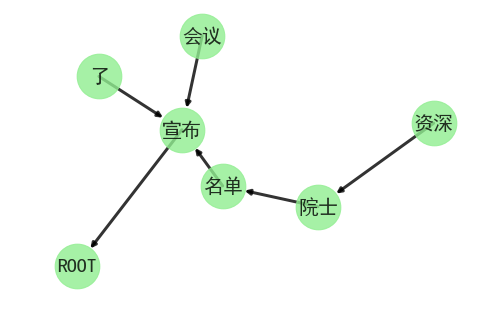

In [9]:
# 用黑体显示中文
mp.rcParams['font.sans-serif']=['SimHei']
# 可视化
nx.draw(G, with_labels=True, node_color='lightgreen', font_size=20, node_size=2000, width=3, alpha=0.8)

In [10]:
nx.shortest_path_length(G, '名单', '宣布')  # 最短距离

1